In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score


In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Data understanding

In [4]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
df.shape

(1000, 17)

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
df.duplicated().sum()

0

## Cleaning

In [9]:
# droping useless columns

df.drop("Invoice ID", axis="columns",inplace=True)
df.drop("Date", axis="columns",inplace=True)
df.drop("Time", axis="columns",inplace=True)
df.drop("gross margin percentage", axis="columns",inplace=True)
df.drop("Tax 5%", axis="columns",inplace=True)
df.drop("cogs", axis="columns",inplace=True)
df.drop("gross income", axis="columns",inplace=True)
df.drop("Total", axis="columns",inplace=True)

In [10]:
#creating a list of columns

columns=list(df.columns)
columns

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Payment',
 'Rating']

In [11]:
# getting catagorical columns

cat_col=[]
for i in columns:
    if df[i].dtype=='object':
        cat_col.append(i)
        
cat_col

['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

In [12]:
# checking the unique values in categorical columns

for i in cat_col:
    print(f"{i}: {len(pd.unique(df[i]))}")

Branch: 3
City: 3
Customer type: 2
Gender: 2
Product line: 6
Payment: 3


In [13]:
# getting numerical columns

num_col=[]
for i in columns:
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        num_col.append(i)

num_col

['Unit price', 'Quantity', 'Rating']

## Label Encoded dataset

In [14]:
df_label_encoded = df[num_col]

In [29]:
#label_enoding categorical columns

label_encoder = LabelEncoder()

# label encoding for each column
for column in cat_col:
    label_encoder = LabelEncoder()
    df_label_encoded[column + '_encoded'] = label_encoder.fit_transform(df[column])

/tmp/ipykernel_8071/1223137054.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_encoded[column + '_encoded'] = label_encoder.fit_transform(df[column])
/tmp/ipykernel_8071/1223137054.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_encoded[column + '_encoded'] = label_encoder.fit_transform(df[column])
/tmp/ipykernel_8071/1223137054.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [30]:
df_label_encoded.shape

(1000, 9)

In [31]:
df_label_encoded.columns

Index(['Unit price', 'Quantity', 'Rating', 'Branch_encoded', 'City_encoded',
       'Customer type_encoded', 'Gender_encoded', 'Product line_encoded',
       'Payment_encoded'],
      dtype='object')

In [32]:
df_label_encoded.head()

,Unit price,Quantity,Rating,Branch_encoded,City_encoded,Customer type_encoded,Gender_encoded,Product line_encoded,Payment_encoded
0,74.69,7,9.1,0,2,0,0,3,2
1,15.28,5,9.6,2,1,1,0,0,0
2,46.33,7,7.4,0,2,1,1,4,1
3,58.22,8,8.4,0,2,0,1,3,2
4,86.31,7,5.3,0,2,1,1,5,2


## OneHot encoded dataset

In [33]:
df_onehot_encoded = df[cat_col]

df_onehot_encoded = pd.get_dummies(df_onehot_encoded[cat_col])

In [34]:
df_onehot_encoded.shape

(1000, 19)

In [35]:
df_onehot_encoded.columns

Index(['Branch_A', 'Branch_B', 'Branch_C', 'City_Mandalay', 'City_Naypyitaw',
       'City_Yangon', 'Customer type_Member', 'Customer type_Normal',
       'Gender_Female', 'Gender_Male', 'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet'],
      dtype='object')

In [36]:
# Dummy variable trap: droping one encoded_column of each column 

df_onehot_encoded.drop("Branch_A", axis="columns",inplace=True)
df_onehot_encoded.drop("City_Mandalay", axis="columns",inplace=True)
df_onehot_encoded.drop("Customer type_Member", axis="columns",inplace=True)
df_onehot_encoded.drop("Gender_Female", axis="columns",inplace=True)
df_onehot_encoded.drop("Product line_Electronic accessories", axis="columns",inplace=True)
df_onehot_encoded.drop("Payment_Cash", axis="columns",inplace=True)

In [37]:
# adding numerical column to onehot dataset

for col in num_col:
    df_onehot_encoded[col] = df[col]

In [38]:
df_onehot_encoded.shape

(1000, 16)

In [39]:
df_onehot_encoded.head()

,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet,Unit price,Quantity,Rating
0,False,False,False,True,False,False,False,False,True,False,False,False,True,74.69,7,9.1
1,False,True,True,False,True,False,False,False,False,False,False,False,False,15.28,5,9.6
2,False,False,False,True,True,True,False,False,False,True,False,True,False,46.33,7,7.4
3,False,False,False,True,False,True,False,False,True,False,False,False,True,58.22,8,8.4
4,False,False,False,True,True,True,False,False,False,False,True,False,True,86.31,7,5.3


## Scaling numerical columns

In [40]:
#scaling label encoder

data_to_scale = df_label_encoded[num_col]

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_to_scale)
df_label_encoded[num_col] = standardized_data

In [41]:
#scaling onehot encoder

data_to_scale = df_onehot_encoded[num_col]

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_to_scale)
df_onehot_encoded[num_col] = standardized_data

In [42]:
df_label_encoded.head()

,Unit price,Quantity,Rating,Branch_encoded,City_encoded,Customer type_encoded,Gender_encoded,Product line_encoded,Payment_encoded
0,0.718160,0.509930,1.238443,0,2,0,0,3,2
1,-1.525303,-0.174540,1.529527,2,1,1,0,0,0
2,-0.352781,0.509930,0.248760,0,2,1,1,4,1
3,0.096214,0.852165,0.830927,0,2,0,1,3,2
4,1.156959,0.509930,-0.973790,0,2,1,1,5,2


In [43]:
df_onehot_encoded.head()

,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet,Unit price,Quantity,Rating
0,False,False,False,True,False,False,False,False,True,False,False,False,True,0.718160,0.509930,1.238443
1,False,True,True,False,True,False,False,False,False,False,False,False,False,-1.525303,-0.174540,1.529527
2,False,False,False,True,True,True,False,False,False,True,False,True,False,-0.352781,0.509930,0.248760
3,False,False,False,True,False,True,False,False,True,False,False,False,True,0.096214,0.852165,0.830927
4,False,False,False,True,True,True,False,False,False,False,True,False,True,1.156959,0.509930,-0.973790


## EDA

Frequency Histograms

IndexError: index 3 is out of bounds for axis 0 with size 3

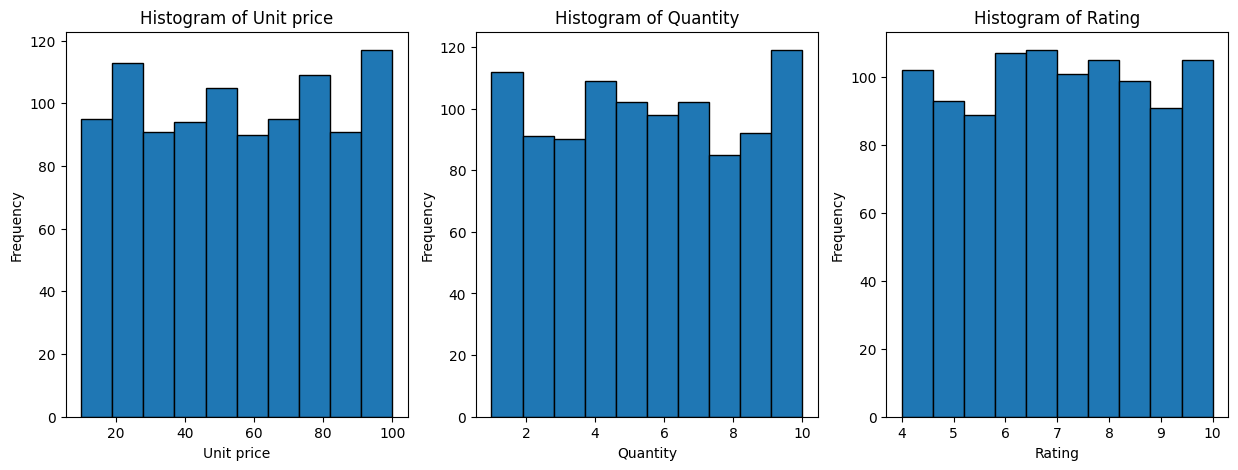

In [32]:
fig, axs = plt.subplots(1, min(3, len(df_label_encoded)), figsize=(15, 5))

for i, variable in enumerate(df_label_encoded[:min(3, len(df_label_encoded))]):
    axs[i].hist(df[variable], bins=10, edgecolor='black')
    axs[i].set_title(f'Histogram of {variable}')
    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Correlation Matrix

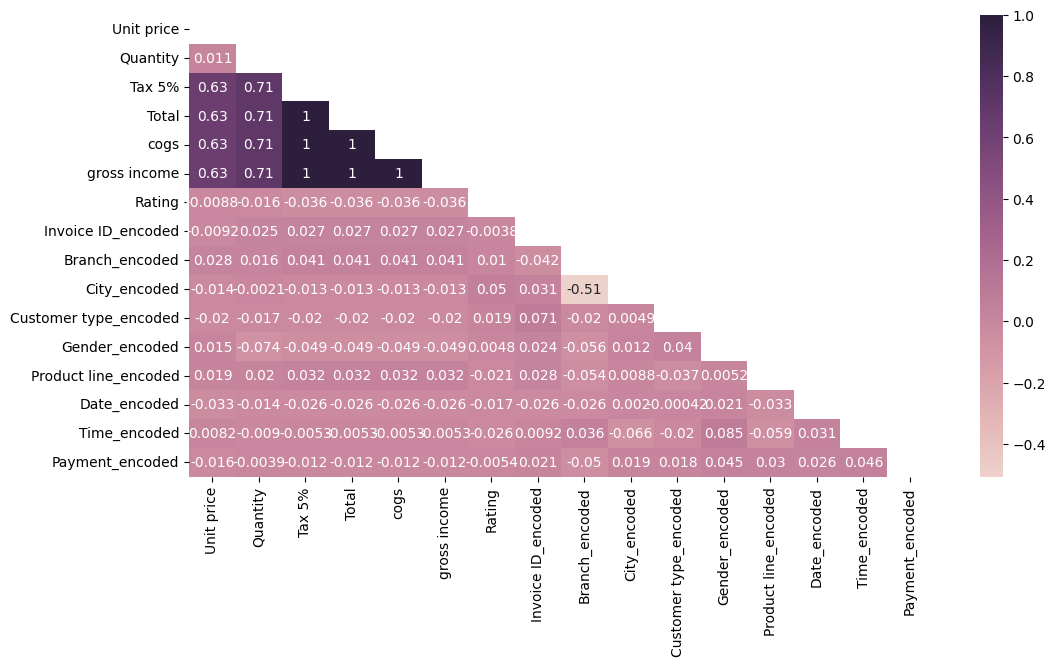

In [33]:
plt.figure(figsize=(12, 6)) 

mask = np.triu(np.ones_like(df_label_encoded.corr()))
dataplot = sns.heatmap(df_label_encoded.corr(), mask=mask, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

plt.show()

## Pair plot

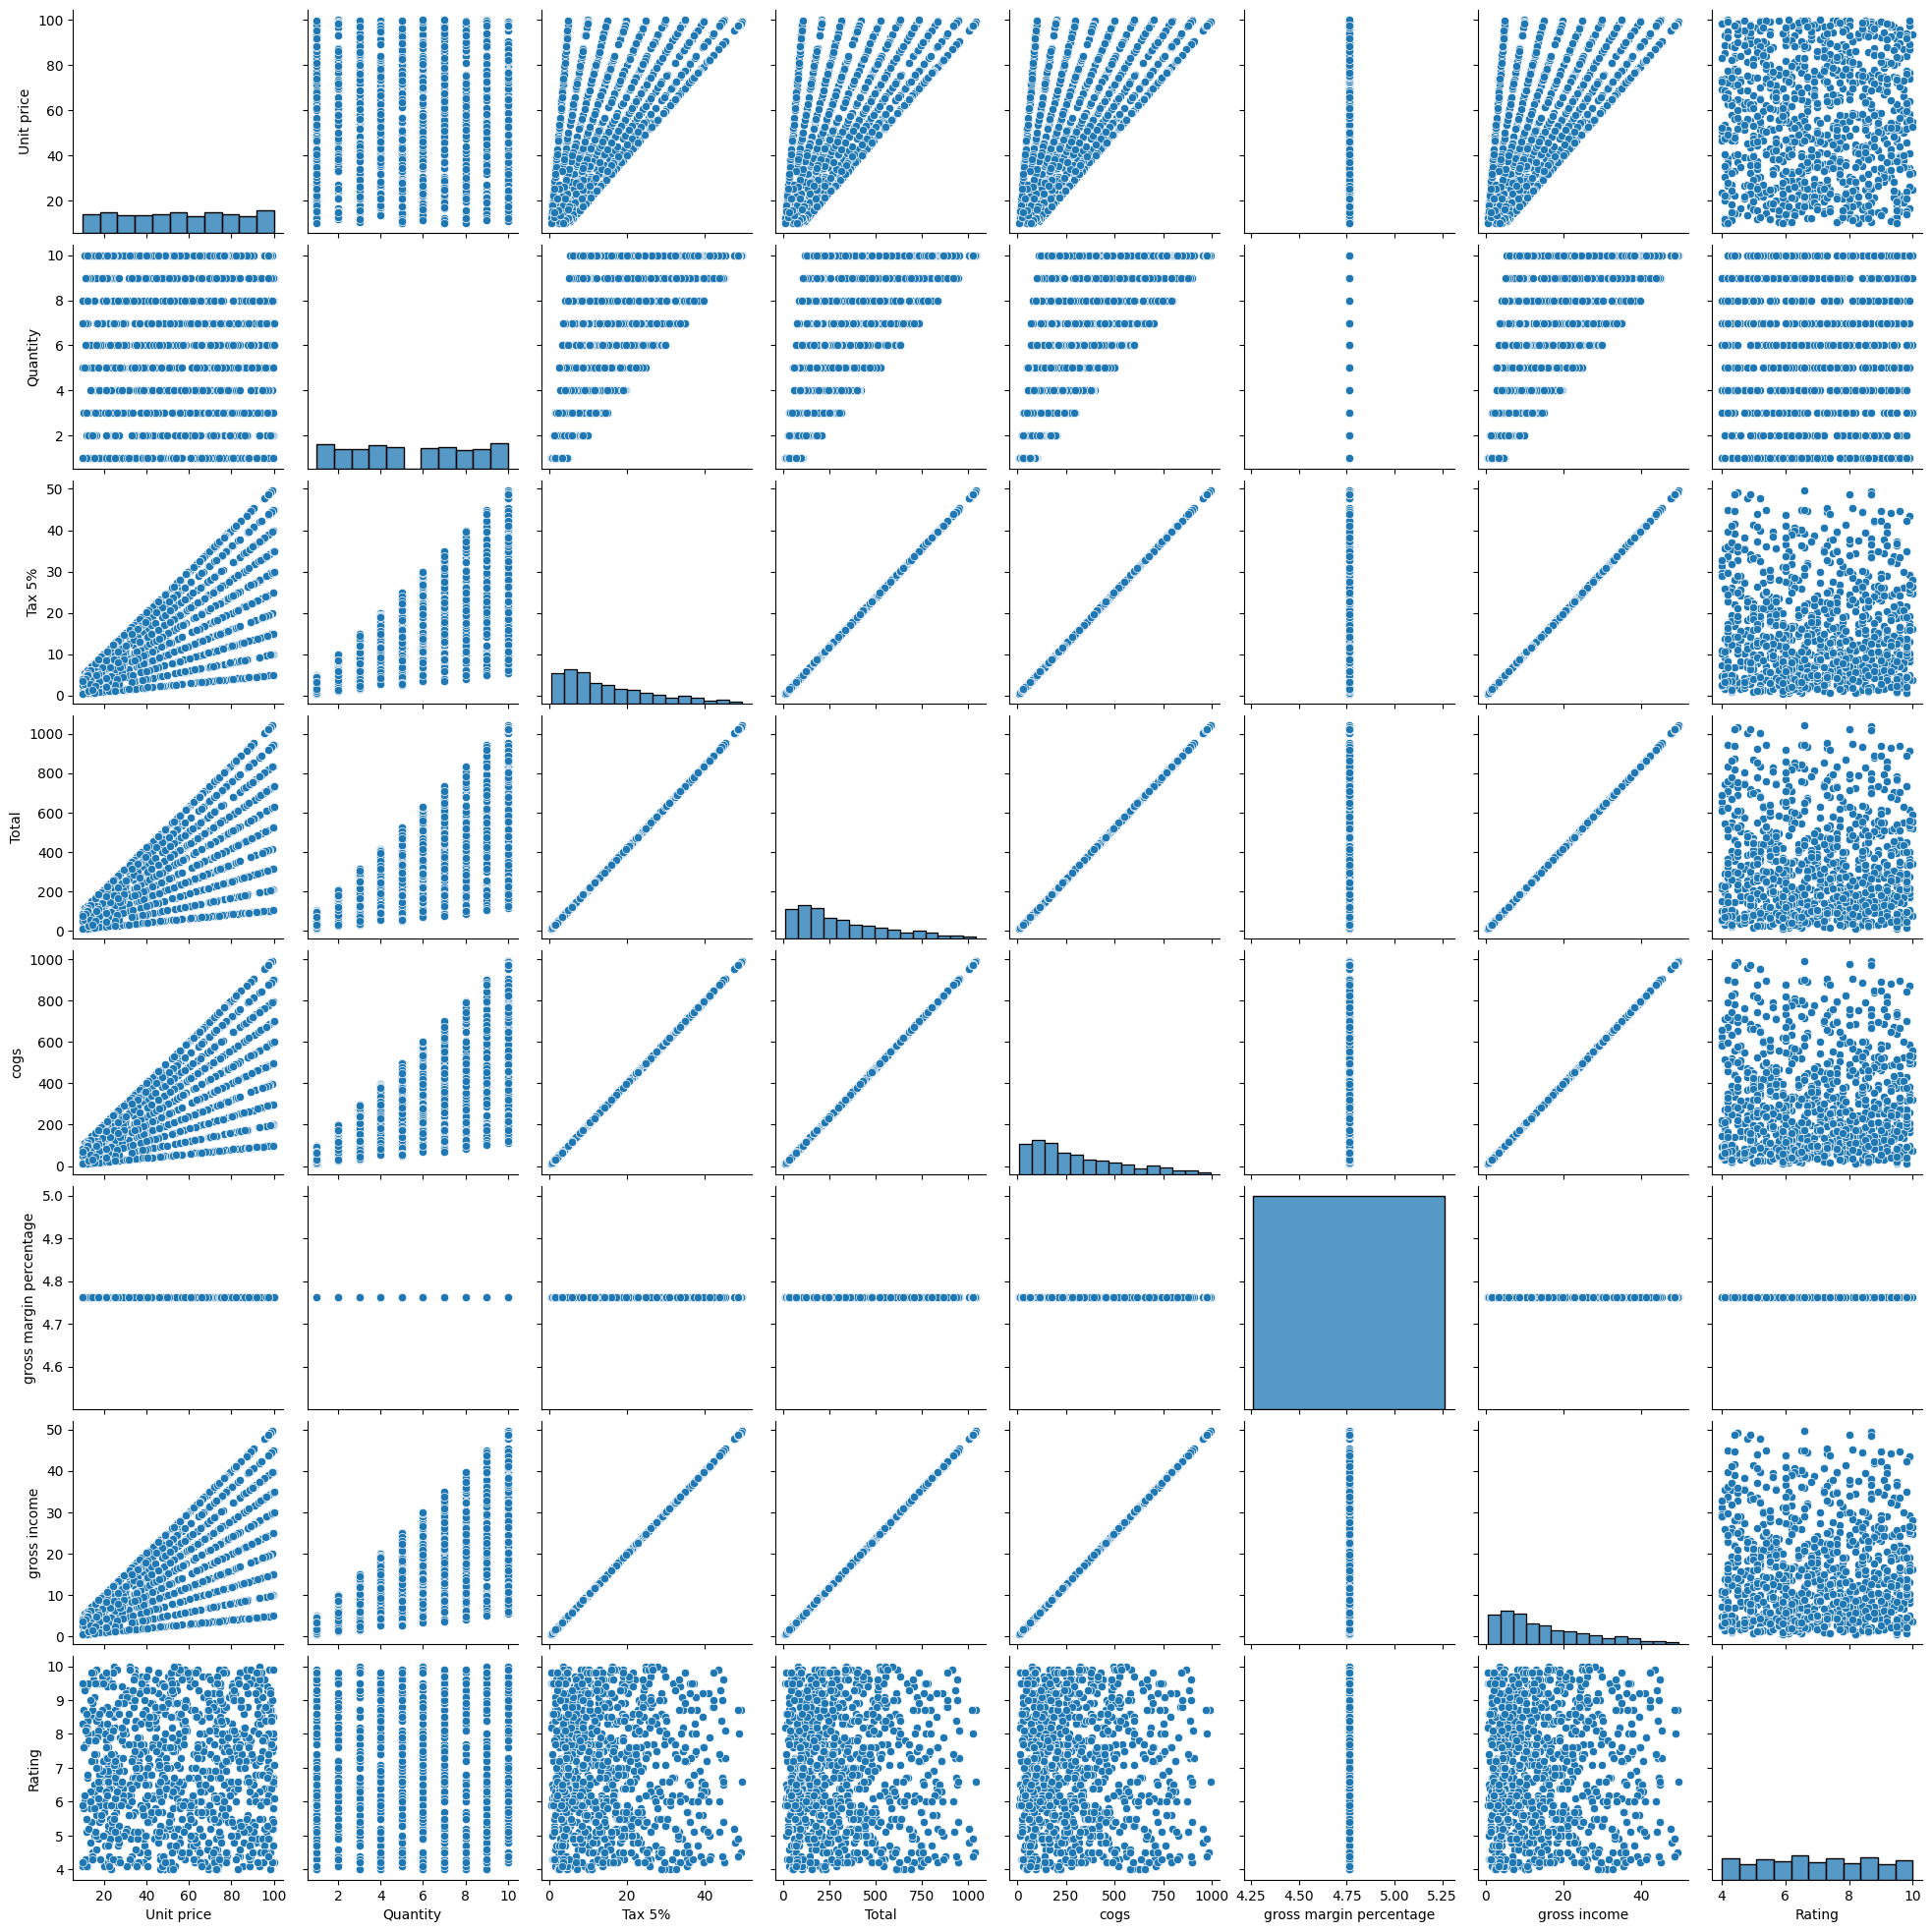

In [20]:
sns.pairplot(df[num_col])

plt.show()

## Elbow Plot

In [34]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_onehot_encoded)
    sse.append(km.inertia_)

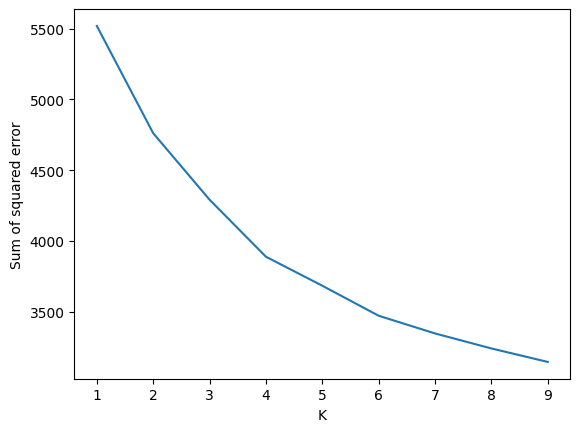

In [35]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## KMEANS MODEL

In [44]:
km = KMeans(n_clusters=4, n_init=20, random_state=55, algorithm="auto")
y_predicted = km.fit_predict(df_onehot_encoded)

/home/lucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [45]:
cluster_centers = km.cluster_centers_
cluster_centers

array([[ 0.31060606,  0.34469697,  0.34469697,  0.34469697,  0.51515152,
         0.48106061,  0.15530303,  0.17424242,  0.1780303 ,  0.17424242,
         0.13257576,  0.3219697 ,  0.33333333, -0.70075578,  0.68882579,
         0.74470423],
       [ 0.28512397,  0.31818182,  0.31818182,  0.39669421,  0.52479339,
         0.53305785,  0.19008264,  0.19421488,  0.14876033,  0.12809917,
         0.19008264,  0.26859504,  0.34297521,  0.91381455, -0.60728334,
         0.64809742],
       [ 0.35123967,  0.33471074,  0.33471074,  0.31404959,  0.46280992,
         0.45041322,  0.15702479,  0.16528926,  0.1446281 ,  0.17355372,
         0.18181818,  0.30578512,  0.37603306,  0.61408108,  0.76589938,
        -0.88838989],
       [ 0.38095238,  0.31349206,  0.31349206,  0.30555556,  0.49206349,
         0.53174603,  0.21031746,  0.16269841,  0.13492063,  0.16269841,
         0.16269841,  0.3452381 ,  0.32936508, -0.73313975, -0.87394877,
        -0.54940928]])

### adding cluster values to LABEL ENCODED && ONEHOT ENCODED and DF

In [46]:
df_label_encoded['Cluster']=y_predicted

In [47]:
df_onehot_encoded['Cluster']=y_predicted

In [48]:
df['Cluster']=y_predicted

## Visualizing KMEANS

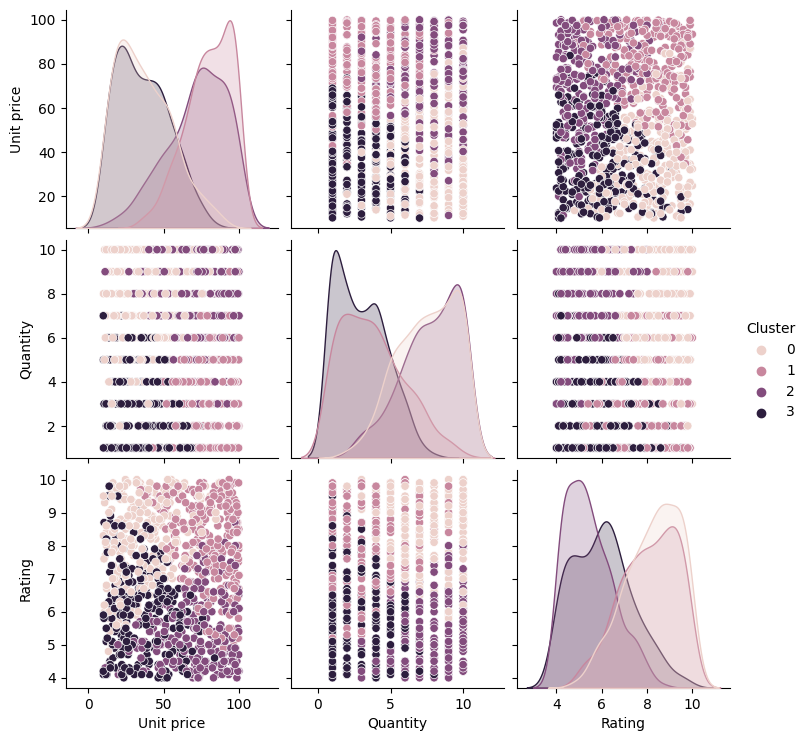

In [49]:
sns.pairplot(
    df,
    hue="Cluster"
)

plt.show()

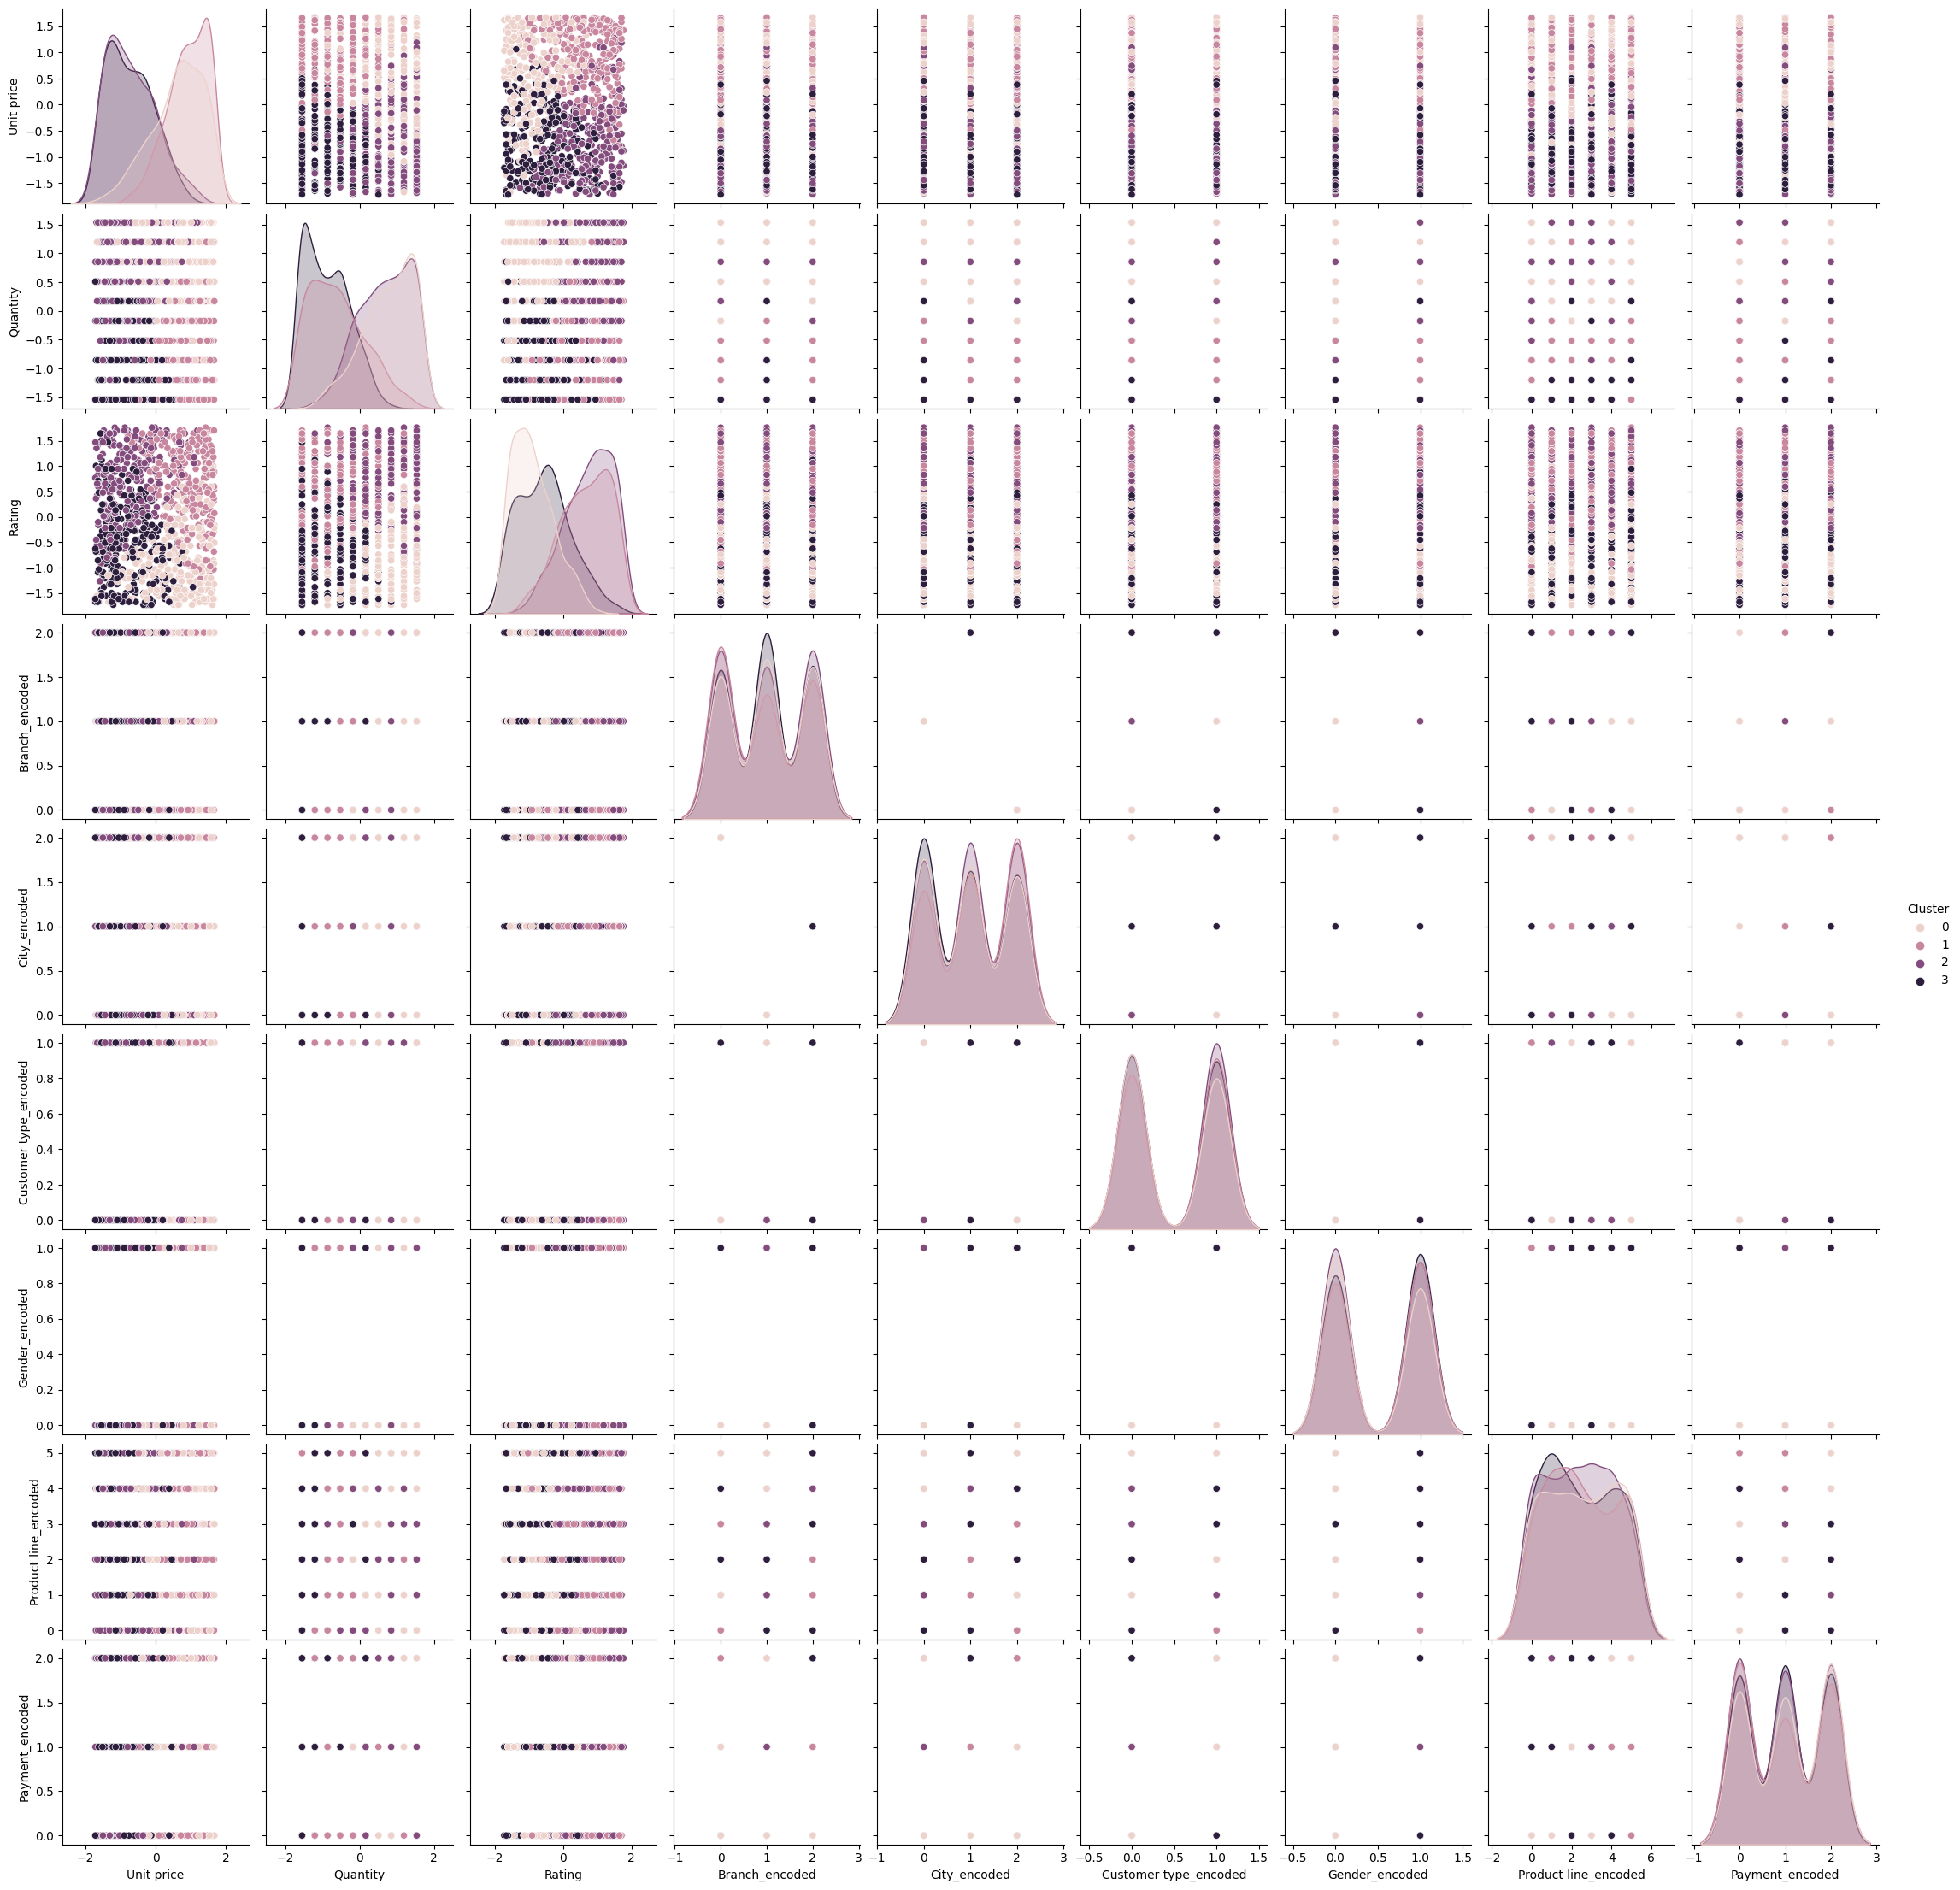

In [70]:
sns.pairplot(
    df_label_encoded,
    hue="Cluster"
)

plt.show()

# Hierercial Level Weighted

In [36]:
# for numerical_col

for i in num_col:
    print(f"{i}: {len(pd.unique(df[i]))} ")

Unit price: 943 
Quantity: 10 
Rating: 61 


In [37]:
result_dict = {}

for i in cat_col:
    value_counts_dict = df[i].value_counts().to_dict()
    result_dict[i] = value_counts_dict

result_dict

{'Branch': {'A': 340, 'B': 332, 'C': 328},
 'City': {'Yangon': 340, 'Mandalay': 332, 'Naypyitaw': 328},
 'Customer type': {'Member': 501, 'Normal': 499},
 'Gender': {'Female': 501, 'Male': 499},
 'Product line': {'Fashion accessories': 178,
  'Food and beverages': 174,
  'Electronic accessories': 170,
  'Sports and travel': 166,
  'Home and lifestyle': 160,
  'Health and beauty': 152},
 'Payment': {'Ewallet': 345, 'Cash': 344, 'Credit card': 311}}

In [38]:
# creating a value chain

values_list = []

for index, row in df.iterrows():
    value = 1
    for i in df:
        if df[i].dtype == 'object':
            value *= ((result_dict[i][row[i]]) / 100)

        if df[i].dtype == 'float64' or df[i].dtype == 'int64':
            value += row[i]
            
    values_list.append(value)

df["value"] = values_list

In [39]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating,Cluster,value
0,A,Yangon,Member,Female,Health and beauty,74.69,7,Ewallet,9.1,1,1812.514626
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,Cash,9.6,0,1652.234988
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,Credit card,7.4,0,1605.573796
3,A,Yangon,Member,Male,Health and beauty,58.22,8,Ewallet,8.4,0,1752.368938
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,Ewallet,5.3,2,1975.708708


In [40]:
# sorting df according to the value chain 
sorted_df = df.sort_values(by="value")

In [110]:
# droping Cluster from sorted_df
sorted_df.drop("", axis="columns",inplace=True)

KeyError: "['Cluster'] not found in axis"

In [41]:
# ranking according to quartiles
q1 = sorted_df["value"].quantile(0.25)
q2 = sorted_df["value"].quantile(0.5)
q3 = sorted_df["value"].quantile(0.75)

def assign_category(value):
    if value <= q1:
        return 1
    elif value <= q2:
        return 2
    elif value <= q3:
        return 3
    else:
        return 4

In [42]:
df["rank"] = df["value"].apply(assign_category) 
df_label_encoded["rank"] = df["value"].apply(assign_category) 
sorted_df["rank"] = sorted_df["value"].apply(assign_category)

In [43]:
sorted_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating,value,rank
787,C,Naypyitaw,Normal,Female,Health and beauty,10.99,5,Credit card,9.3,1330.451526,1
236,C,Naypyitaw,Normal,Male,Health and beauty,17.41,5,Credit card,4.9,1340.942187,1
595,B,Mandalay,Normal,Male,Health and beauty,14.82,3,Credit card,8.7,1361.542134,1
445,B,Mandalay,Member,Female,Health and beauty,19.15,1,Credit card,9.5,1380.009451,1
349,B,Mandalay,Normal,Female,Health and beauty,13.50,10,Credit card,4.8,1380.507021,1


In [44]:
sorted_df.drop("value", axis="columns",inplace=True)

## Visualizing Hierercial Level Weighted results

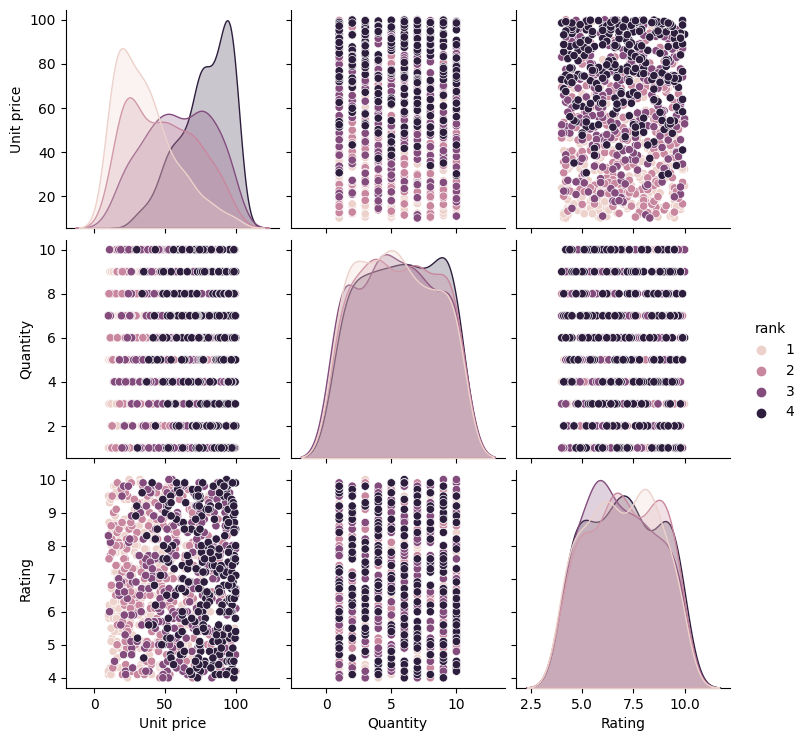

In [83]:
sns.pairplot(
    sorted_df,
    hue="rank"
)

plt.show()

## Max Dissimilarity, Average Dissimilarity, Isolation

In [99]:
from scipy.spatial.distance import cdist

# Assuming you have your DataFrame with one-hot encoded data and the "Cluster" column
# Let's assume the DataFrame is called "df_onehot_encoded"

# Get the cluster labels from the DataFrame
cluster_labels = df_onehot_encoded['Cluster']

# Calculate the cluster centers
cluster_centers = df_onehot_encoded.drop("Cluster", axis=1).groupby(cluster_labels).mean()

# Calculate the distances between pairs of clusters
cluster_distances = cdist(cluster_centers, cluster_centers, 'euclidean')

# Create a list to store the values between pairs of clusters
values_list = []

# Calculate and store the values in the list
K = len(cluster_centers)
for i in range(K):
    for j in range(i + 1, K):
        cluster_label_1 = cluster_centers.index[i]
        cluster_label_2 = cluster_centers.index[j]
        cluster_label_2

        # Calculate the maximum dissimilarity and average dissimilarity between the two clusters
        max_dissimilarity = np.max([np.max(cluster_distances[i, :]), np.max(cluster_distances[:, j])])

        average_dissimilarity = np.mean([np.mean(cluster_distances[i, :]), np.mean(cluster_distances[:, j])])

        # Calculate the isolation between the two clusters
        isolation = average_dissimilarity / max_dissimilarity

        # Calculate the number of observations in each cluster
        num_obs_cluster1 = (cluster_labels == cluster_label_1).sum()
        num_obs_cluster2 = (cluster_labels == cluster_label_2).sum()

        # Append the values to the list
        values_list.append({
            'Cluster 1': cluster_label_1,
            'Cluster 2': cluster_label_2,
            'Max Dissimilarity': max_dissimilarity,
            'Average Dissimilarity': average_dissimilarity,
            'Isolation': isolation,
            'Number of Observations Cluster 1': num_obs_cluster1,
            'Number of Observations Cluster 2': num_obs_cluster2
        })

# Create the DataFrame from the list of values
values_df = pd.DataFrame(values_list)

# Display the DataFrame with the values between pairs of clusters
print("\nValues between Pairs of Clusters:")
print(values_df)



Values between Pairs of Clusters:
   Cluster 1  Cluster 2  Max Dissimilarity  Average Dissimilarity  Isolation  \
0          0          1           2.153021               1.571281   0.729803   
1          0          2           2.153021               1.569386   0.728923   
2          0          3           2.153021               1.573823   0.730984   
3          1          2           2.100931               1.554850   0.740077   
4          1          3           2.153021               1.559287   0.724232   
5          2          3           2.153021               1.557392   0.723352   

   Number of Observations Cluster 1  Number of Observations Cluster 2  
0                               242                               242  
1                               242                               264  
2                               242                               252  
3                               242                               264  
4                               242         

In [50]:
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np

# Assuming you have your DataFrame with one-hot encoded data and the "Cluster" column
# Let's assume the DataFrame is called "df_onehot_encoded"

# Get the cluster labels from the DataFrame
cluster_labels = df_onehot_encoded['Cluster']

# Calculate the cluster centers
cluster_centers = df_onehot_encoded.drop("Cluster", axis=1).groupby(cluster_labels).mean()

# Calculate the distances between pairs of clusters
cluster_distances = cdist(cluster_centers, cluster_centers, 'euclidean')

# Create a list to store the values between pairs of clusters
values_list = []

# Calculate and store the values for all pairs of clusters
K = len(cluster_centers)
for i in range(K):
    for j in range(i + 1, K):
        cluster_label_1 = cluster_centers.index[i]
        cluster_label_2 = cluster_centers.index[j]

        # Calculate the maximum dissimilarity and average dissimilarity between the two clusters
        max_dissimilarity = np.max([np.max(cluster_distances[i, :]), np.max(cluster_distances[j, :])])

        average_dissimilarity = np.mean([np.mean(cluster_distances[i, :]), np.mean(cluster_distances[j, :])])

        # Calculate the isolation between the two clusters
        isolation = average_dissimilarity / max_dissimilarity

        # Calculate the number of observations in each cluster
        num_obs_cluster1 = (cluster_labels == cluster_label_1).sum()
        num_obs_cluster2 = (cluster_labels == cluster_label_2).sum()

        # Append the values to the list
        values_list.append({
            'Cluster 1': cluster_label_1,
            'Cluster 2': cluster_label_2,
            'Max Dissimilarity': max_dissimilarity,
            'Average Dissimilarity': average_dissimilarity,
            'Isolation': isolation,
            'Number of Observations Cluster 1': num_obs_cluster1,
            'Number of Observations Cluster 2': num_obs_cluster2
        })

# Create the DataFrame from the list of values
values_df = pd.DataFrame(values_list)

# Display the DataFrame with the values between pairs of clusters
print("\nValues between Pairs of Clusters:")
print(values_df)



Values between Pairs of Clusters:
   Cluster 1  Cluster 2  Max Dissimilarity  Average Dissimilarity  Isolation  \
0          0          1           2.100931               1.554850   0.740077   
1          0          2           2.153021               1.569386   0.728923   
2          0          3           2.153021               1.557392   0.723352   
3          1          2           2.153021               1.571281   0.729803   
4          1          3           2.153021               1.559287   0.724232   
5          2          3           2.153021               1.573823   0.730984   

   Number of Observations Cluster 1  Number of Observations Cluster 2  
0                               264                               242  
1                               264                               242  
2                               264                               252  
3                               242                               242  
4                               242         

## Creating df dataset for results calculation

### for sorted_df

In [58]:
sorted_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating,rank
787,C,Naypyitaw,Normal,Female,Health and beauty,10.99,5,Credit card,9.3,1
236,C,Naypyitaw,Normal,Male,Health and beauty,17.41,5,Credit card,4.9,1
595,B,Mandalay,Normal,Male,Health and beauty,14.82,3,Credit card,8.7,1
445,B,Mandalay,Member,Female,Health and beauty,19.15,1,Credit card,9.5,1
349,B,Mandalay,Normal,Female,Health and beauty,13.50,10,Credit card,4.8,1


In [121]:
cat_col = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

sorted_df_onehot_encoded = df[cat_col]
sorted_df_onehot_encoded = pd.get_dummies(sorted_df_onehot_encoded[cat_col])

In [122]:
sorted_df_onehot_encoded.columns

Index(['Branch_A', 'Branch_B', 'Branch_C', 'City_Mandalay', 'City_Naypyitaw',
       'City_Yangon', 'Customer type_Member', 'Customer type_Normal',
       'Gender_Female', 'Gender_Male', 'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet'],
      dtype='object')

In [123]:
# Dummy variable trap: droping one encoded_column of each column 

sorted_df_onehot_encoded.drop("Branch_A", axis="columns",inplace=True)
sorted_df_onehot_encoded.drop("City_Mandalay", axis="columns",inplace=True)
sorted_df_onehot_encoded.drop("Customer type_Member", axis="columns",inplace=True)
sorted_df_onehot_encoded.drop("Gender_Female", axis="columns",inplace=True)
sorted_df_onehot_encoded.drop("Product line_Electronic accessories", axis="columns",inplace=True)
sorted_df_onehot_encoded.drop("Payment_Cash", axis="columns",inplace=True)

In [124]:
# adding numerical column to onehot dataset
num_col = ['Unit price', 'Quantity', 'Rating', 'rank']
for col in num_col:
    sorted_df_onehot_encoded[col] = df[col]

In [125]:
sorted_df_onehot_encoded.columns

Index(['Branch_B', 'Branch_C', 'City_Naypyitaw', 'City_Yangon',
       'Customer type_Normal', 'Gender_Male',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Credit card',
       'Payment_Ewallet', 'Unit price', 'Quantity', 'Rating', 'rank'],
      dtype='object')

## Silhouette Score

In [126]:
def calculate_silhouette_score(X, y):
  """Calculates the B. Silhouette Score for the k-means algorithm.

  Args:
    X: A numpy array containing the data to be clustered.
    y: A numpy array containing the cluster labels for each data point.

  Returns:
    The B. Silhouette Score, a measure of the quality of the clustering.
  """

  # Calculate the silhouette score for each data point.
  silhouette_scores = silhouette_score(X, y)

  # Calculate the B. Silhouette Score as the average of the silhouette scores for all data points.
  b_silhouette_score = np.mean(silhouette_scores)

  return b_silhouette_score

In [130]:
# Silhouette Score for k-means
y = df_onehot_encoded["Cluster"]
X = df_onehot_encoded.drop('Cluster', axis='columns')

b_silhouette_score = calculate_silhouette_score(X, y)

b_silhouette_score

-0.011634216362781993

In [129]:
# Silhouette Score for HLWA
y = sorted_df_onehot_encoded['rank']
X = sorted_df_onehot_encoded.drop('rank', axis='columns')

b_silhouette_score = calculate_silhouette_score(X, y)

b_silhouette_score

-0.05185092296379385

## Davies Bouldin

In [134]:
y = df_onehot_encoded["Cluster"]
X = df_onehot_encoded.drop('Cluster', axis='columns')

db_score = davies_bouldin_score(X, y)

print("Davies Bouldin score: ", db_score)

Davies Bouldin score:  26.13167549676786


In [136]:
y = sorted_df_onehot_encoded["rank"]
X = sorted_df_onehot_encoded.drop('rank', axis='columns')

db_score = davies_bouldin_score(X, y)

print("Davies Bouldin score: ", db_score)

Davies Bouldin score:  3.1154333329362456


## Calinski-Harabasz Index

In [147]:
y = df_onehot_encoded['Cluster']
X = df_onehot_encoded.drop('Cluster', axis='columns')

ch_score = calinski_harabasz_score(X, labels)

print("Calinski-Harabasz Index:", ch_score)

Calinski-Harabasz Index: 1.1177563187936501


In [149]:
y = sorted_df_onehot_encoded['rank']
X = sorted_df_onehot_encoded.drop('rank', axis='columns')

ch_score = calinski_harabasz_score(X, labels)

print("Calinski-Harabasz Index:", ch_score)

Calinski-Harabasz Index: 416.05255840252045
